In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# df = pd.read_csv("hf://datasets/criteo/FairJob/fairjob.csv.gz")abs
# df.to_csv("fairjob.csv", index=False)

df_unsplitted=pd.read_csv('D:/Harsh/MTech/ML/fairjob.csv/criteo_fairness_dataset_2024-01-01_2024-05-20.csv');


In [4]:
def stratified_split(df,categorical_col):
    np.random.seed(42)  
    
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()
    val_data = pd.DataFrame()

    for category in df[categorical_col].unique():
        category_data = df[df[categorical_col] == category]
        shuffled = category_data.sample(frac=1).reset_index(drop=True)  

        total = len(shuffled)
        train_end = int(total * 0.9)
        test_end = int(total * 0.95)

        train_data = pd.concat([train_data, shuffled.iloc[:train_end]])
        test_data = pd.concat([test_data, shuffled.iloc[train_end:test_end]])
        val_data = pd.concat([val_data, shuffled.iloc[test_end:]])

    train_data.reset_index(drop=True, inplace=True)
    test_data.reset_index(drop=True, inplace=True)
    val_data.reset_index(drop=True, inplace=True)

    return train_data, test_data, val_data



In [5]:
df, test_df, val_df = stratified_split(df_unsplitted,'protected_attribute')

In [9]:
df

,click,protected_attribute,senior,displayrandom,rank,user_id,impression_id,product_id,cat0,cat1,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
0,0,0,0,0,3,17477,145726,39279,7,7,...,-0.333033,-0.542801,-0.393358,-0.837161,-0.523668,-0.728001,-0.345480,-0.577173,-0.264359,-0.789129
1,0,0,1,0,14,21374,47349,19039,5,5,...,-0.333033,-0.542801,-0.393358,-0.084462,-0.494652,0.784293,-0.345480,-0.577173,-0.264359,-0.011676
2,0,0,1,0,11,20206,106908,2402,6,6,...,-0.333033,-0.542801,0.023570,1.609864,0.980050,0.490437,-0.252768,0.257664,-0.264359,1.698722
3,0,0,0,0,1,9428,24942,18708,8,8,...,-0.333033,-0.542801,-0.229794,0.651121,-0.033695,-0.190051,-0.067343,0.552430,-0.264359,0.713948
4,0,0,0,1,1,25465,244574,58155,6,7,...,-0.333033,-0.542801,-0.066230,0.359854,-0.511271,0.138434,-0.067343,-0.577173,-0.264359,-0.996450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964997,0,1,0,0,2,7113,226642,56997,5,5,...,-0.333033,-0.542801,-0.393358,1.069677,-0.378588,0.087618,-0.345480,-0.577173,-0.264359,1.180420
964998,0,1,1,0,15,3944,81052,48873,8,8,...,-0.333033,-0.542801,-0.303558,-0.887341,-0.494652,-0.179302,0.268049,-0.577173,-0.264359,-0.840959
964999,0,1,0,0,11,14259,58310,43483,7,7,...,-0.050435,0.925347,1.437919,-0.210518,-0.132302,-0.006728,-0.345480,-0.577173,-0.264359,-0.167166
965000,0,1,0,0,4,16621,46416,55215,7,8,...,-0.333033,-0.542801,-0.393358,-0.987701,-0.407604,-0.660033,-0.345480,0.257664,-0.264359,-0.996450


In [10]:
df.describe()

,click,protected_attribute,senior,displayrandom,rank,user_id,impression_id,product_id,cat0,cat1,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
count,965002.000000,965002.0,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,...,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000,965002.000000
mean,0.006971,0.5,0.665413,0.098516,6.174332,15991.615388,131973.562716,30658.035711,6.375565,6.716221,...,-0.001853,-0.000454,-0.010419,-0.020367,0.005225,0.001573,0.002597,-0.011535,-0.002095,-0.021439
std,0.083201,0.5,0.471846,0.298011,4.753173,9185.329957,64766.213467,17723.292870,2.169387,1.772094,...,0.985280,1.002538,0.997552,0.990057,1.028242,1.018893,1.013001,0.982313,0.997063,0.988238
min,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.333033,-0.542801,-0.393358,-0.987701,-0.523668,-0.778977,-0.345480,-0.577173,-0.264359,-0.996450
25%,0.000000,0.0,0.000000,0.000000,2.000000,8013.000000,78599.000000,14888.000000,6.000000,6.000000,...,-0.333033,-0.542801,-0.393358,-0.837161,-0.494652,-0.620500,-0.345480,-0.577173,-0.264359,-0.840959
50%,0.000000,0.5,1.000000,0.000000,5.000000,16106.000000,130142.000000,30754.500000,7.000000,8.000000,...,-0.333033,-0.542801,-0.354873,-0.382902,-0.349572,-0.303199,-0.345480,-0.577173,-0.264359,-0.374487
75%,0.000000,1.0,1.000000,0.000000,9.000000,24073.000000,188701.000000,45742.000000,8.000000,8.000000,...,-0.050435,0.925347,-0.046987,0.567878,0.085668,0.239694,-0.067343,0.257664,-0.264359,0.558457
max,1.000000,1.0,1.000000,1.000000,40.000000,31879.000000,246360.000000,62153.000000,8.000000,8.000000,...,40.361096,12.324090,19.782770,14.297500,32.738320,20.520984,22.334339,18.574885,23.672271,14.811769


In [11]:
df.shape

(965002, 56)

In [13]:
df.duplicated().sum()

0

All the rows are unique

In [14]:
print("Unique user_id:", df['user_id'].nunique())
print("Unique product_id:", df['product_id'].nunique())
print("Unique impression_id:", df['impression_id'].nunique())

Unique user_id: 29804
Unique product_id: 55901
Unique impression_id: 218297


In [15]:
df.groupby(['user_id', 'product_id']).ngroups

522095

In [16]:
df.groupby(['user_id', 'impression_id']).ngroups

218297

In [17]:
df.groupby(['product_id', 'impression_id']).ngroups

958495

##### 'product_id' and 'impression_id' can be primary key
only (965002 - 958495) 6507 rows have repeated combination for these 2 features


In [18]:
key_counts = df.groupby(['product_id', 'impression_id']).size()

repeated_keys = key_counts[key_counts > 1]

print(repeated_keys)

product_id  impression_id
15          220260           2
26          41016            2
43          164307           2
            169945           2
            169970           2
                            ..
62067       206405           2
            206413           2
            206666           2
            210310           2
            210334           2
Length: 6507, dtype: int64


In [19]:
total_repeated_rows = repeated_keys.sum()

print(f"Total number of rows with repeated keys: {total_repeated_rows}")

Total number of rows with repeated keys: 13014


In [20]:
df.columns

Index(['click', 'protected_attribute', 'senior', 'displayrandom', 'rank',
       'user_id', 'impression_id', 'product_id', 'cat0', 'cat1', 'cat2',
       'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
       'cat11', 'cat12', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21',
       'num22', 'num23', 'num24', 'num25', 'num26', 'num27', 'num28', 'num29',
       'num30', 'num31', 'num32', 'num33', 'num34', 'num35', 'num36', 'num37',
       'num38', 'num39', 'num40', 'num41', 'num42', 'num43', 'num44', 'num45',
       'num46', 'num47', 'num48', 'num49', 'num50'],
      dtype='object')

### Features
- **user_id** is a unique identifier assigned to each user. This identifier has been anonymized and does not contain any information related to the real users.
- **product_id** is a unique identifier assigned to each product, i.e. job offer.
- **impression_id** is a unique identifier assigned to each impression, i.e. online session that can have several products at the same time.
- **cat0** to **cat5** are anonymized categorical user features.
- **cat6** to **cat12** are anonymized categorical product features.
- **num13** to **num47** are anonymized numerical user features.

### Labels
 - **protected_attribute** is a binary feature that describes user gender proxy, i.e. female is 0, male is 1. The detailed description on the meaning can be found below.
- **senior** is a binary feature that describes the seniority of the job position, i.e. an assistant role is 0, a managerial role is 1. This feature was created during data processing step from the product title feature: if the product title contains words describing managerial role (e.g. 'president', 'ceo', and others), it is assigned to 1, otherwise to 0.
- **rank** is a numerical feature that corresponds to the positional rank of the product on the display for given impression_id. Usually, the position on the display creates the bias with respect to the click: lower rank means higher position of the product on the display.
- **displayrandom** is a binary feature that equals 1 if the display position on the banner of the products associated with the same impression_id was randomized. The click-rank metric should be computed on displayrandom = 1 to avoid positional bias.
- **click** is a binary feature that equals 1 if the product product_id in the impression impression_id was clicked by the user user_id.

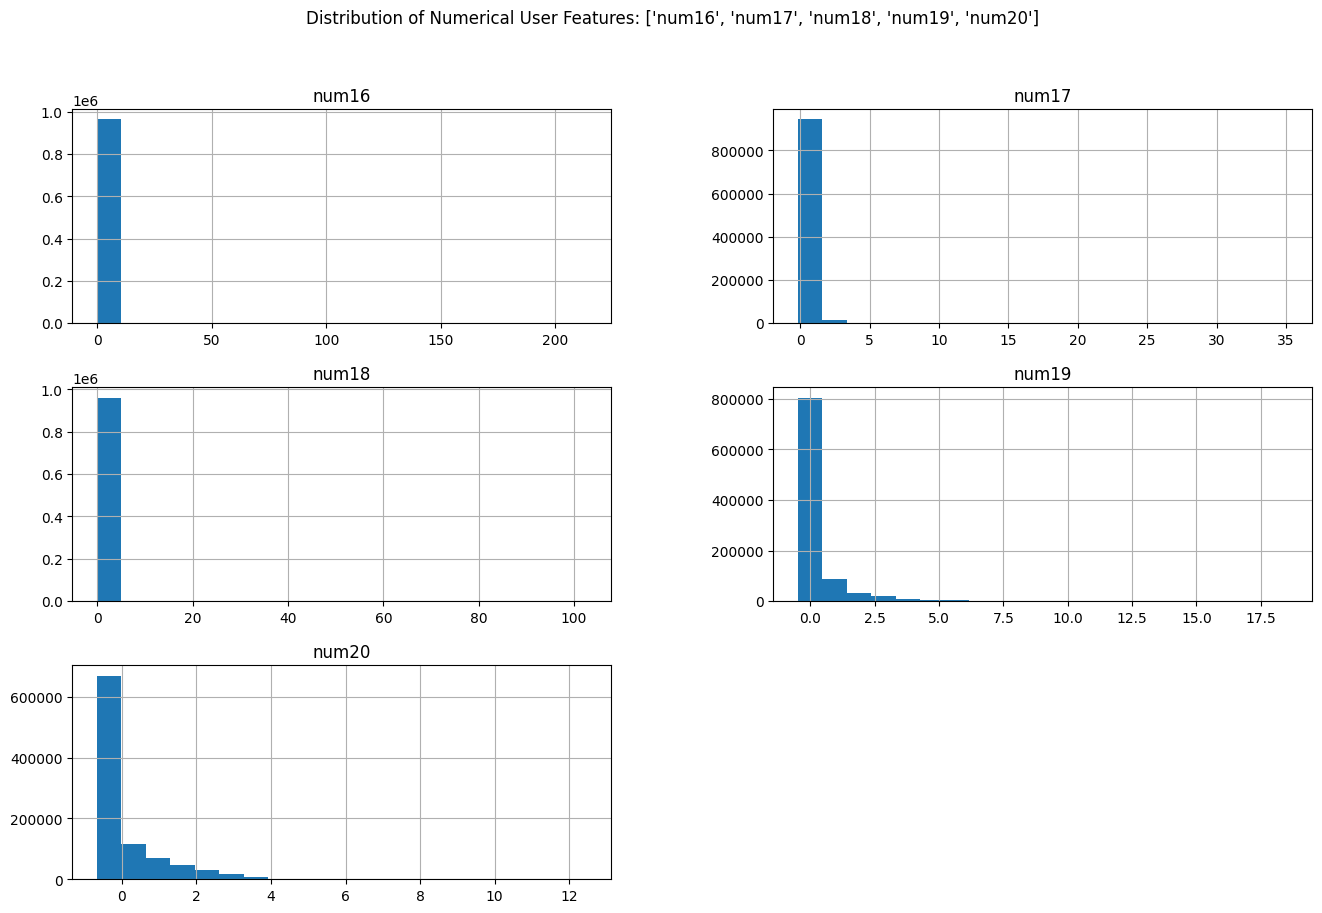

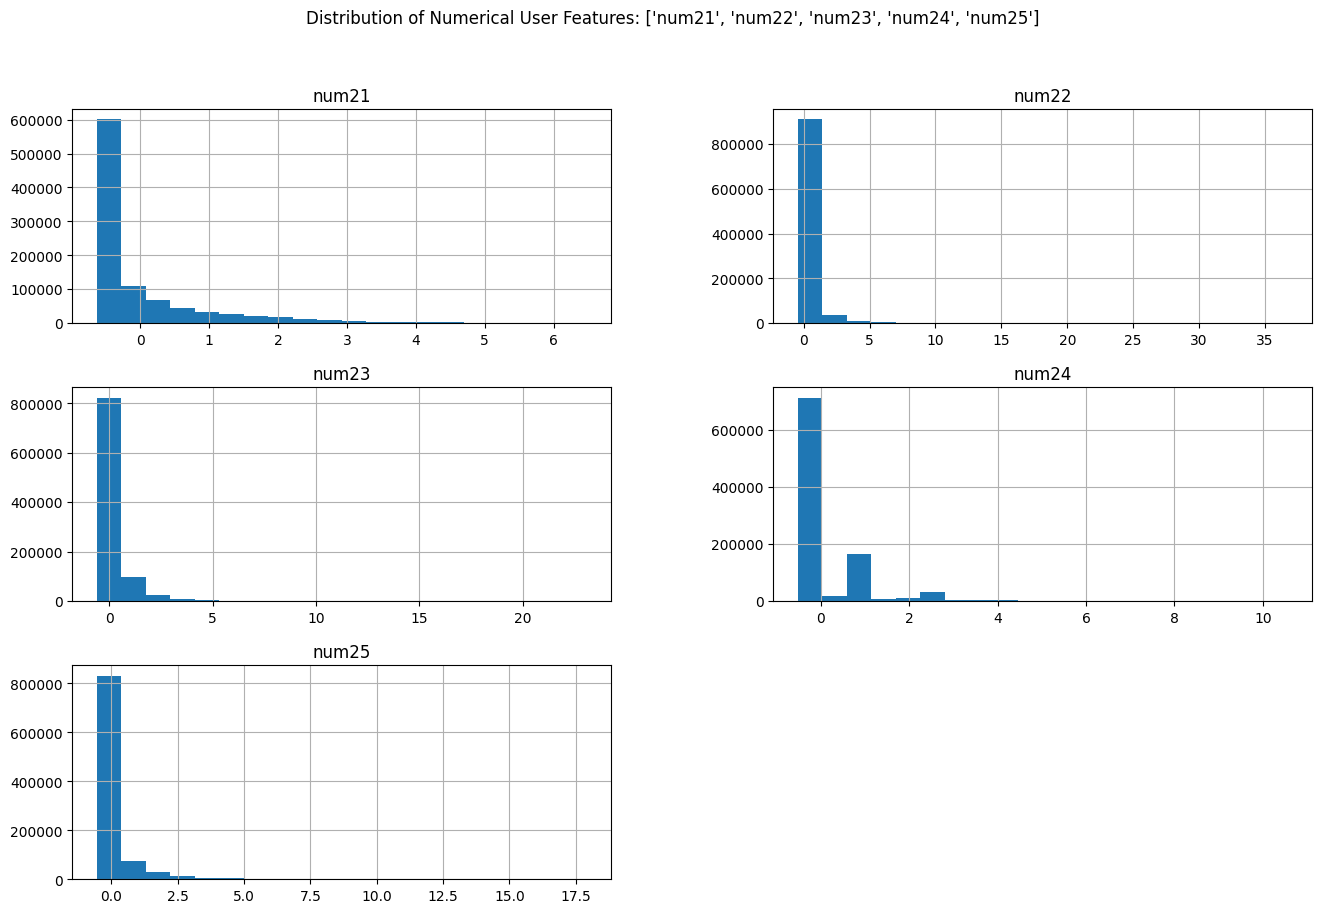

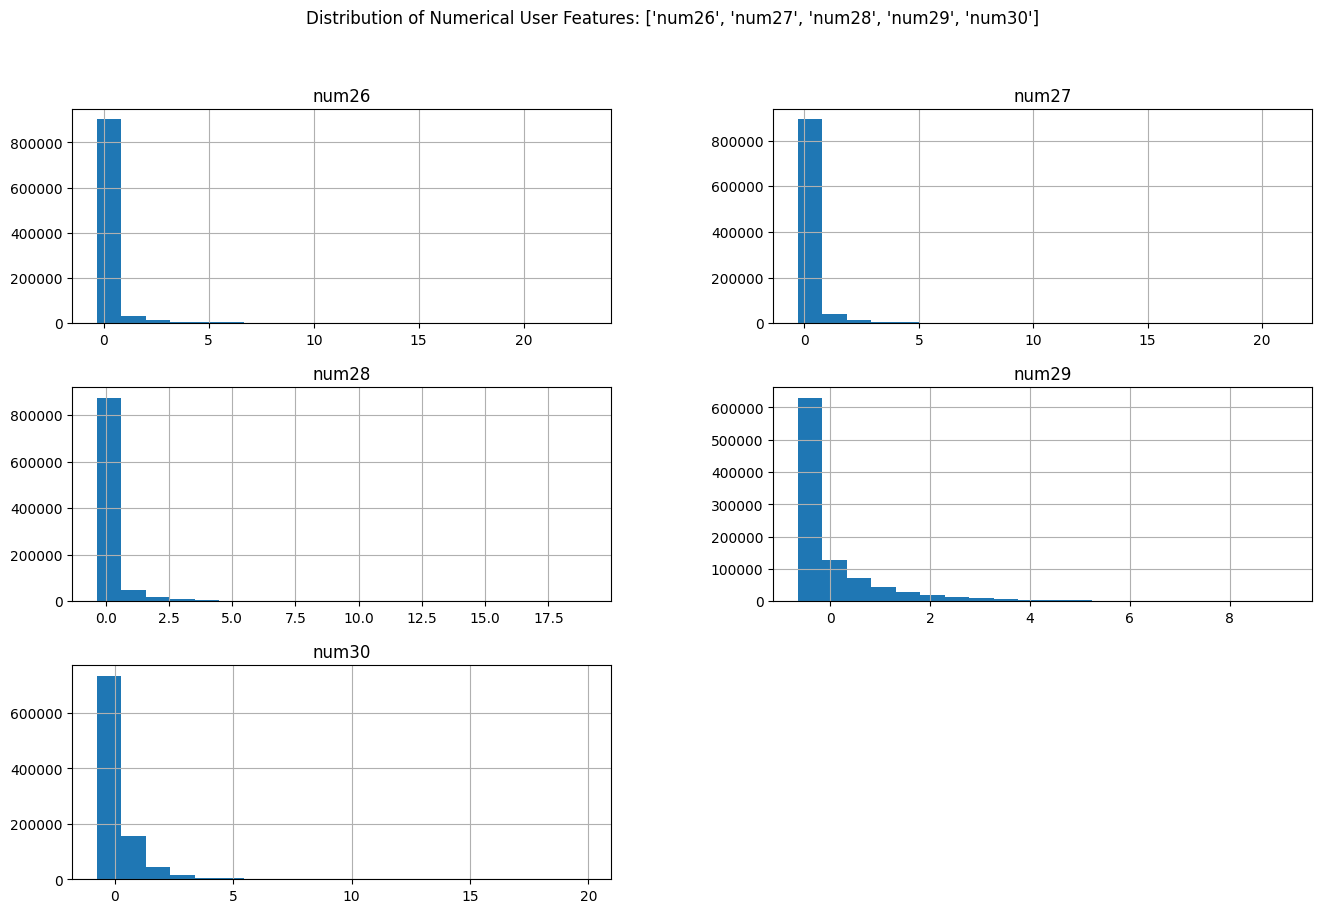

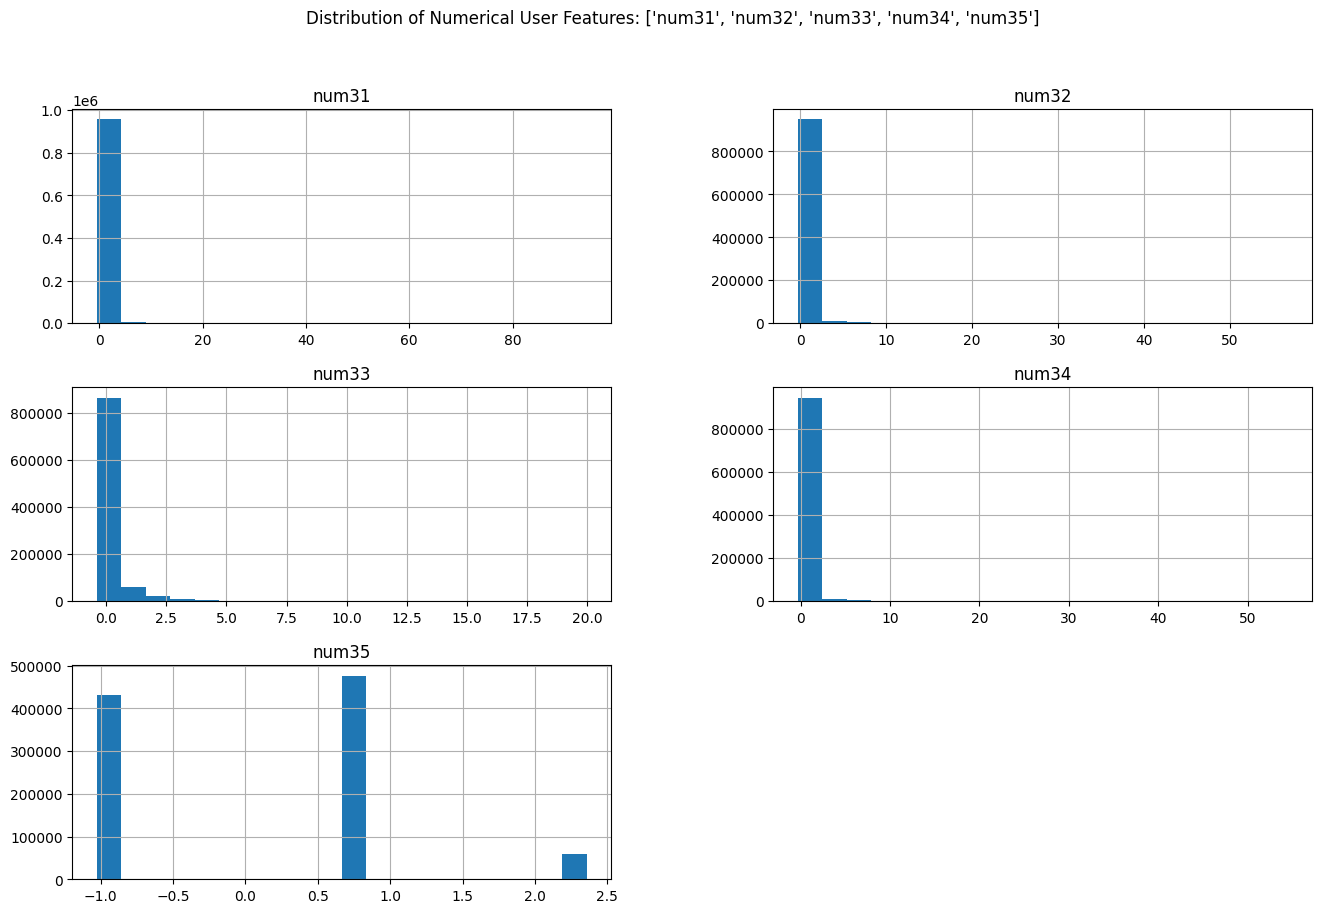

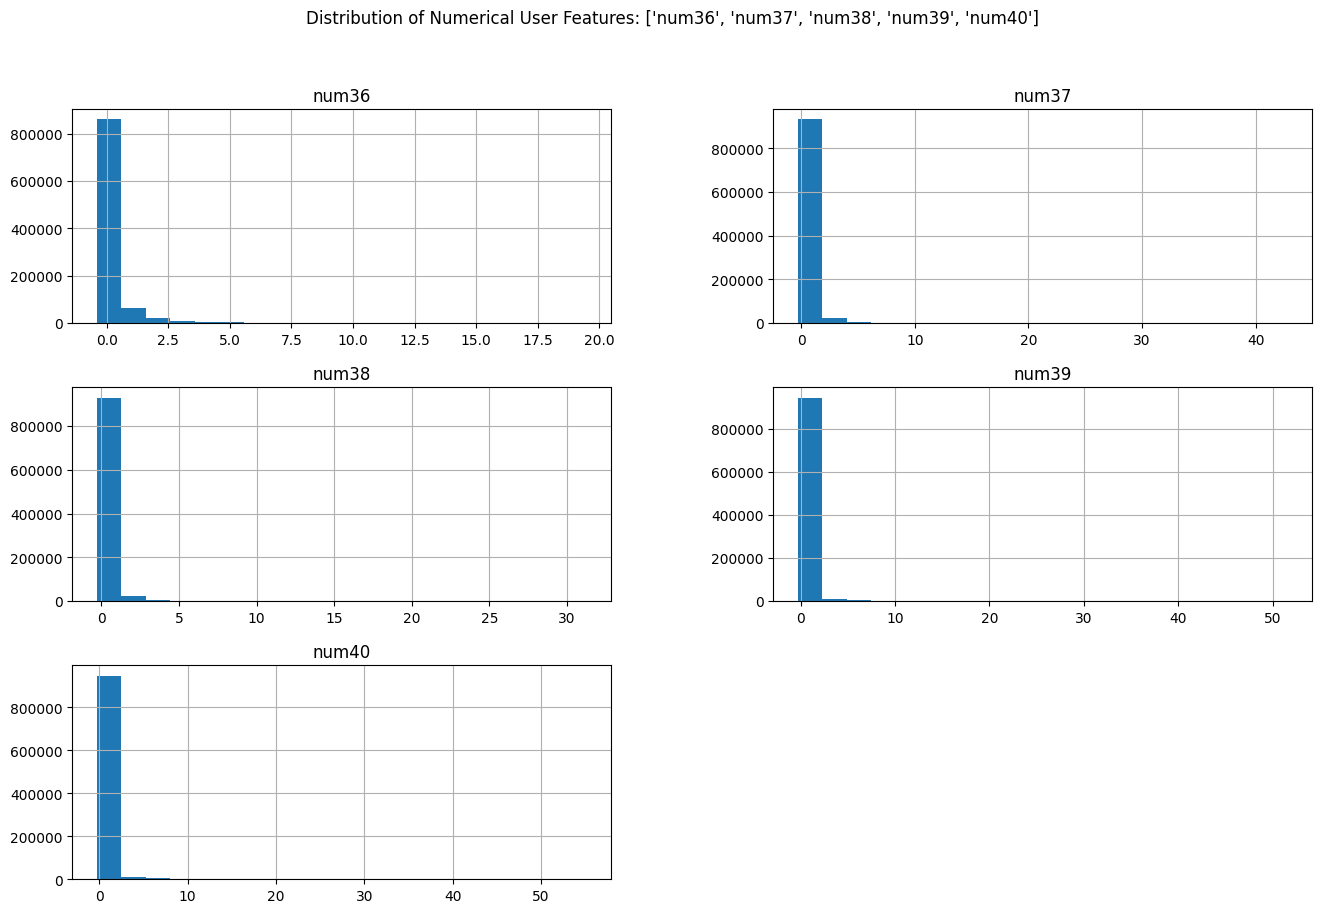

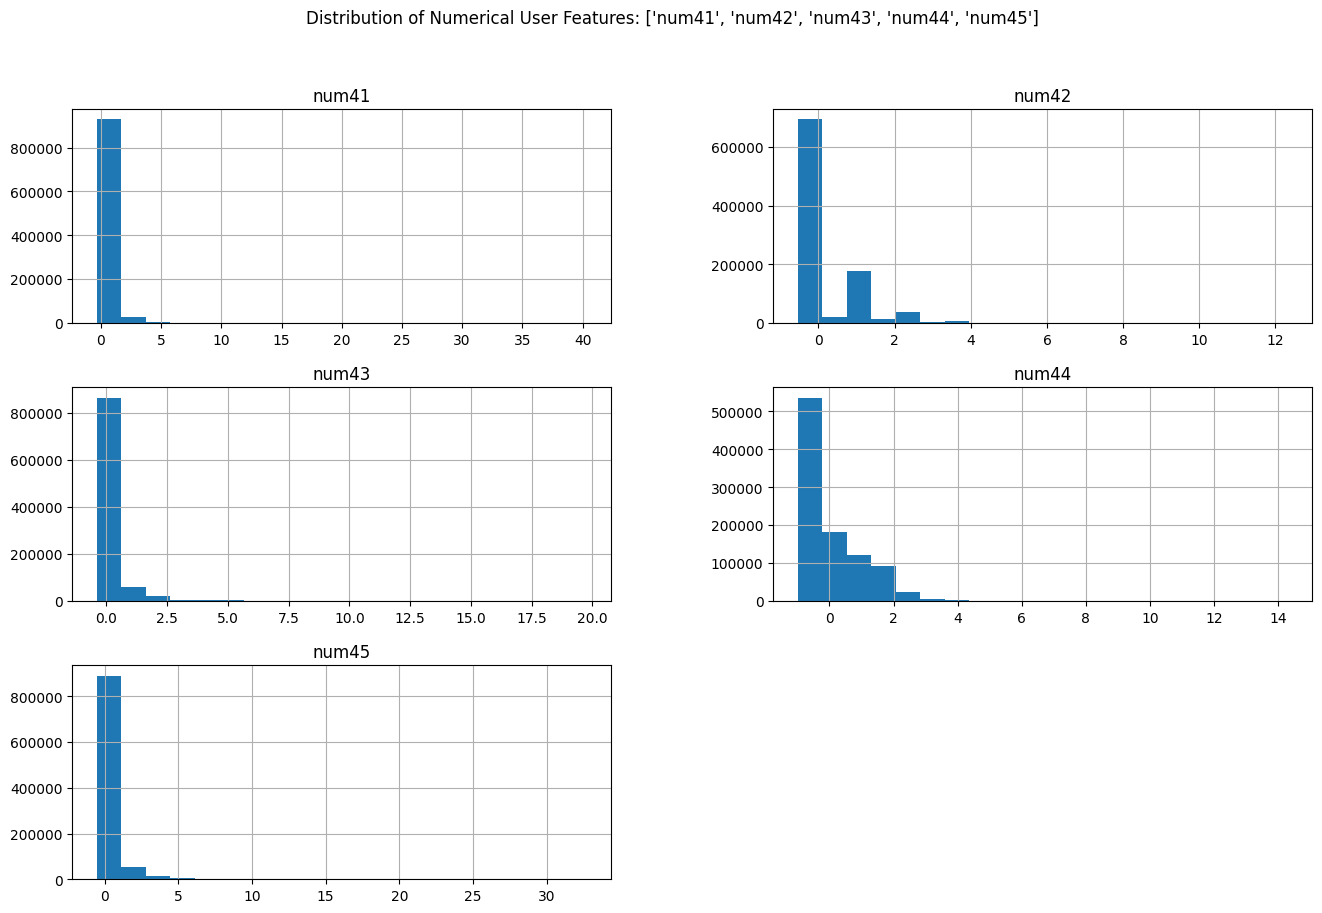

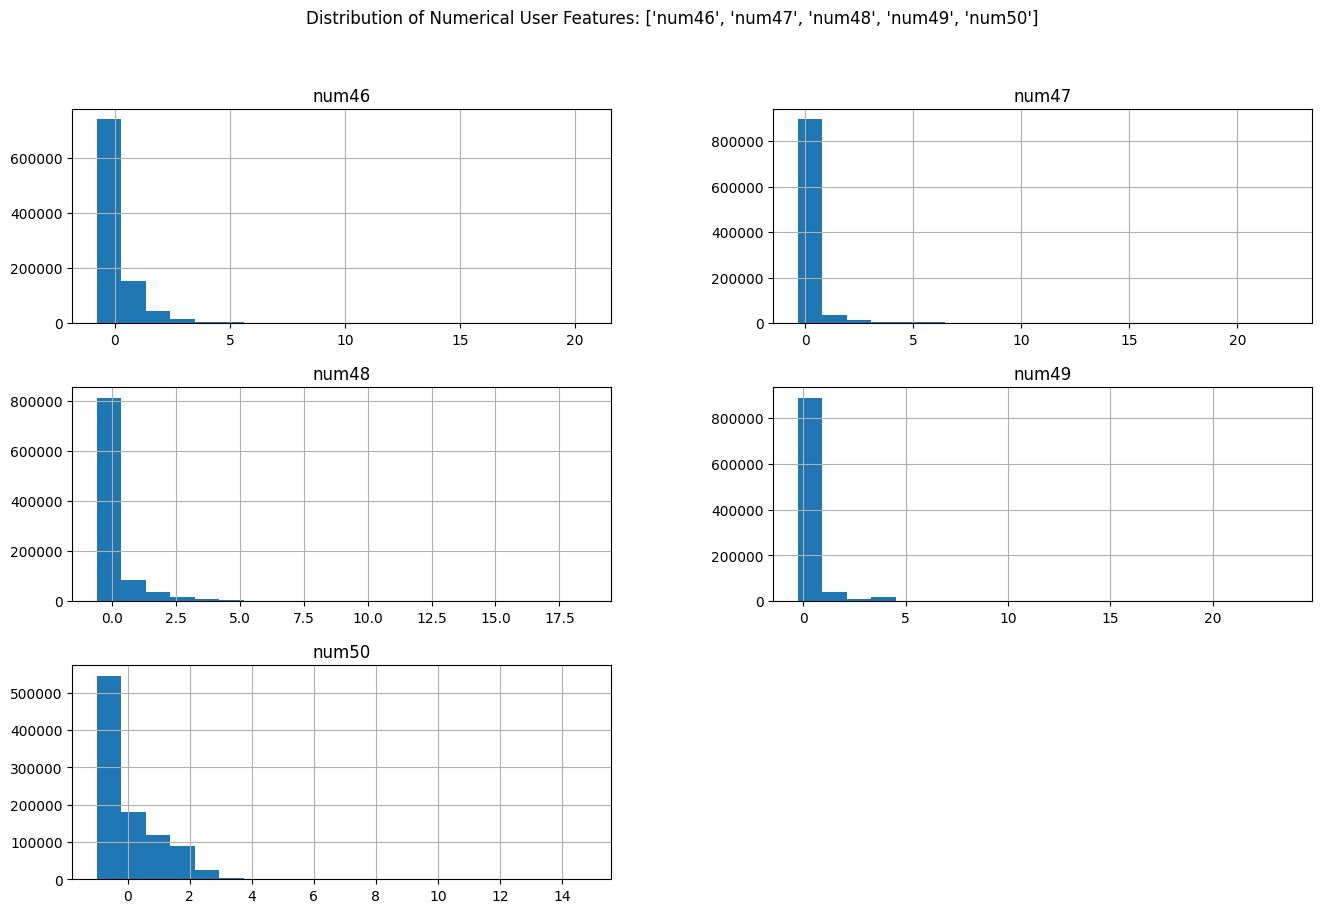

In [21]:
numerical_features = [f'num{i}' for i in range(16, 51)]

for i in range(0, len(numerical_features), 5):
    cols = numerical_features[i:i+5]
    
    df[cols].hist(bins=20, figsize=(16, 10))
    plt.suptitle(f"Distribution of Numerical User Features: {cols}")
    plt.show()

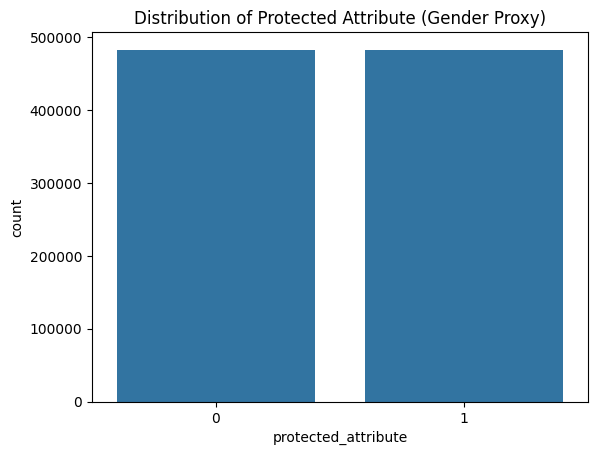

In [22]:
sns.countplot(data=df, x='protected_attribute')
plt.title("Distribution of Protected Attribute (Gender Proxy)")
plt.show()

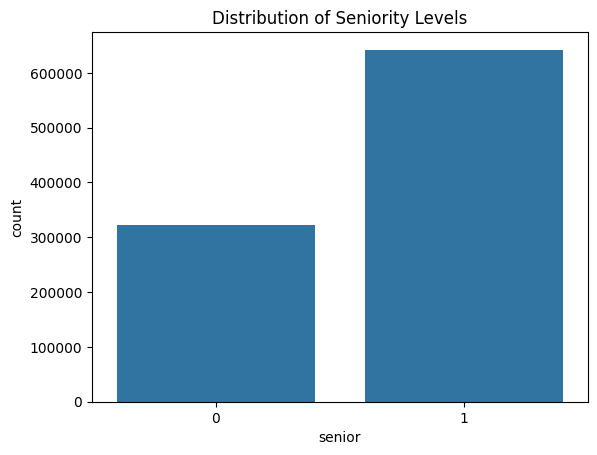

In [23]:
sns.countplot(data=df, x='senior')
plt.title("Distribution of Seniority Levels")
plt.show()

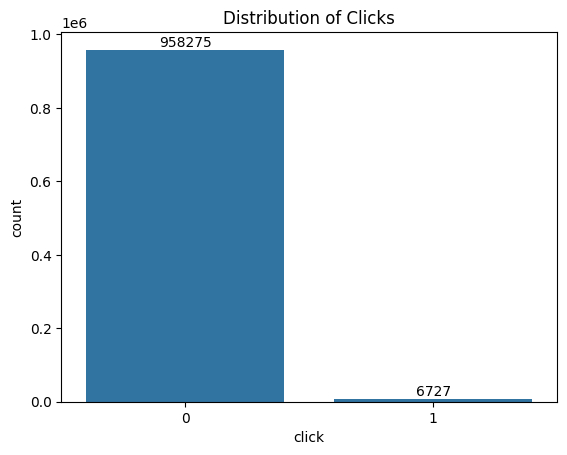

In [24]:
ax = sns.countplot(data=df, x='click')
plt.title("Distribution of Clicks")
ax.bar_label(ax.containers[0])
plt.show()

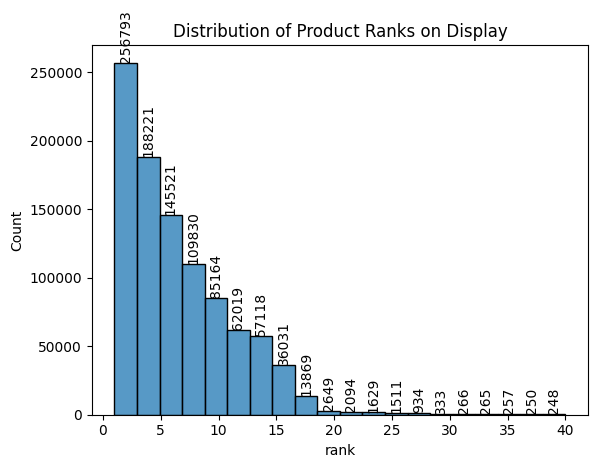

In [26]:
ax = sns.histplot(data=df, x='rank', bins=20)
plt.title("Distribution of Product Ranks on Display")
ax.bar_label(ax.containers[0],rotation=90)
plt.show()

In [33]:
df['rank'].describe()

count    965002.000000
mean          6.174332
std           4.753173
min           1.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          40.000000
Name: rank, dtype: float64

In [40]:
df[df['rank']<=5]['click'].count()

526043

More than 50% of times the product is displayed at a rank<=5

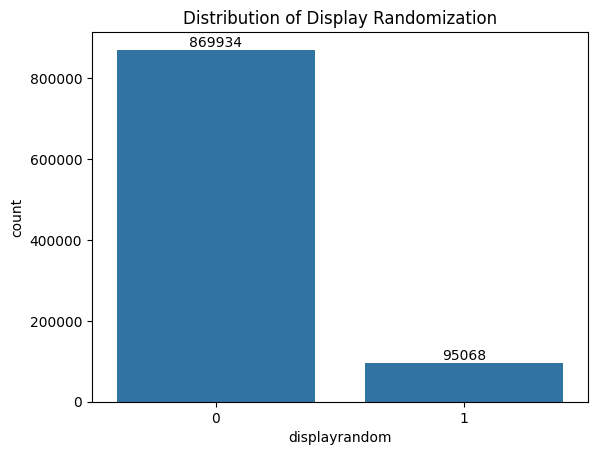

In [28]:
ax = sns.countplot(data=df, x='displayrandom')
plt.title("Distribution of Display Randomization")
ax.bar_label(ax.containers[0])
plt.show()

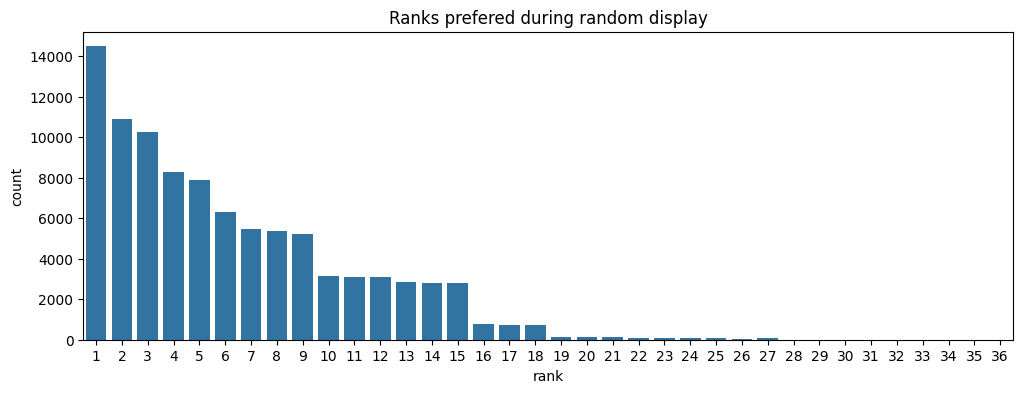

In [30]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df[df['displayrandom']==1], x='rank')
plt.title("Ranks prefered during random display")

plt.show()

In [31]:
df[df['displayrandom']==1]['rank'].describe()

count    95068.000000
mean         6.139668
std          4.628668
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         36.000000
Name: rank, dtype: float64

### Displayrandom

#### Conclusions :
- when an ad is displayed randomly, more than 50% of times it is displayed at a rank <=5

### Feature vs Click relations


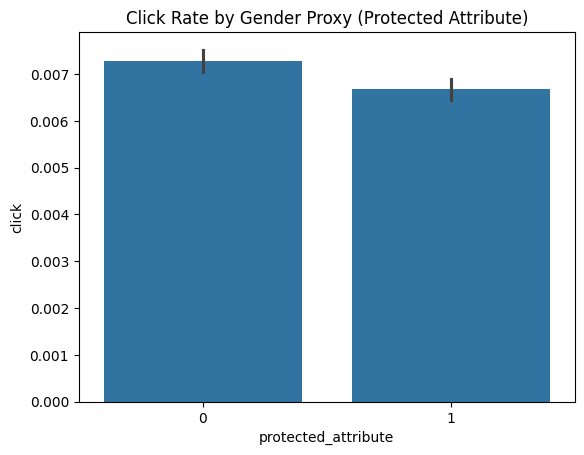

In [32]:
sns.barplot(data=df, x='protected_attribute', y='click')
plt.title("Click Rate by Gender Proxy (Protected Attribute)")
plt.show()

### Conclusion:
- Females click more often then males

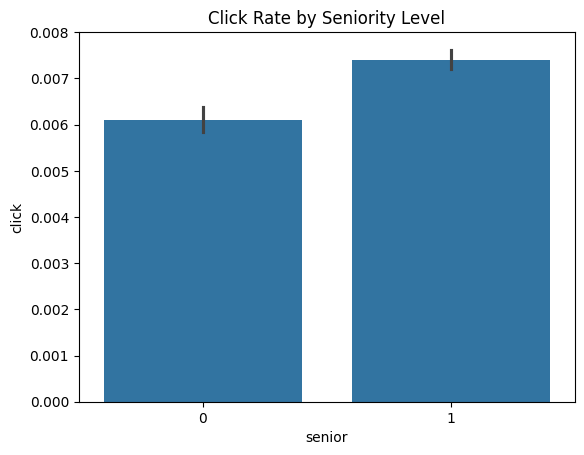

In [41]:
sns.barplot(data=df, x='senior', y='click')
plt.title("Click Rate by Seniority Level")
plt.show()

### Conclusion:
- Jobs with Managerial roles get more clicks than Assistant roles

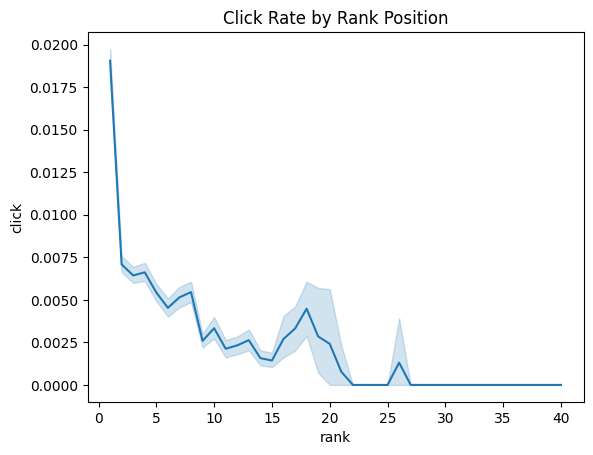

In [42]:
sns.lineplot(data=df, x='rank', y='click')
plt.title("Click Rate by Rank Position")
plt.show()

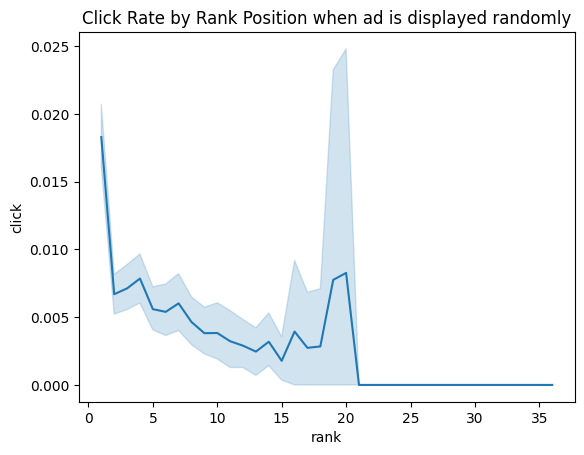

In [43]:
sns.lineplot(data=df[df['displayrandom']==1], x='rank', y='click')
plt.title("Click Rate by Rank Position when ad is displayed randomly")
plt.show()

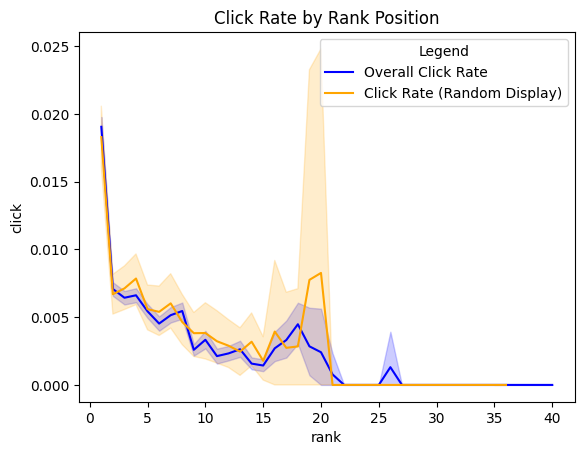

In [44]:
sns.lineplot(data=df, x='rank', y='click', label="Overall Click Rate", color="blue")

sns.lineplot(data=df[df['displayrandom'] == 1], x='rank', y='click', 
             label="Click Rate (Random Display)", color="orange")

plt.title("Click Rate by Rank Position")
plt.legend(title="Legend")
plt.show()


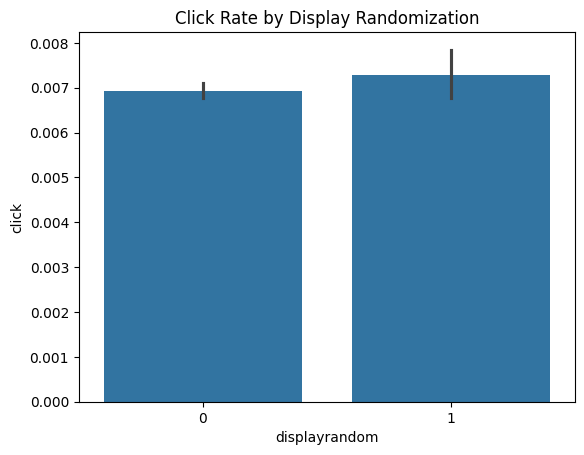

In [45]:
sns.barplot(data=df, x='displayrandom', y='click')
plt.title("Click Rate by Display Randomization")
plt.show()

- when ad is displayed randomly there is bit high chance of it getting clicked

## Categorical user features

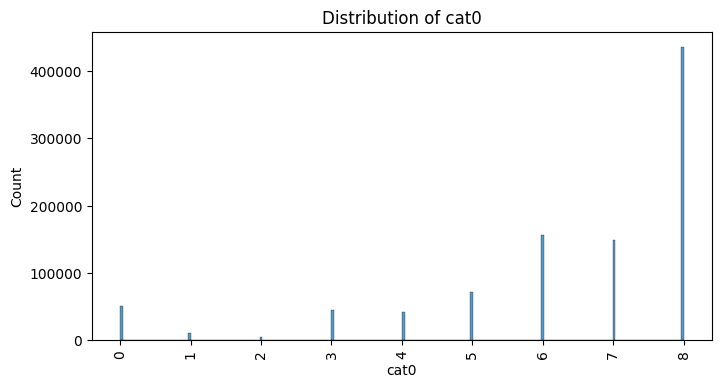

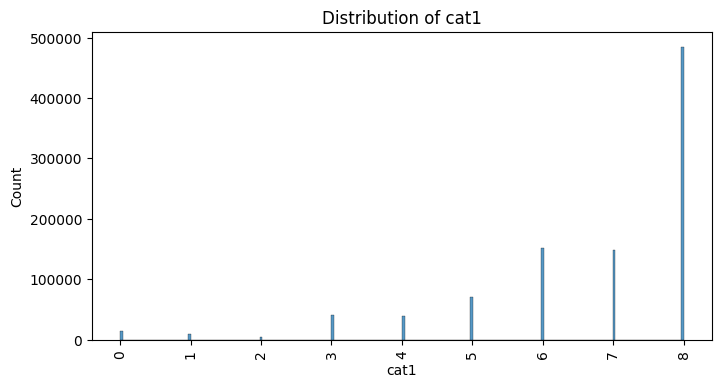

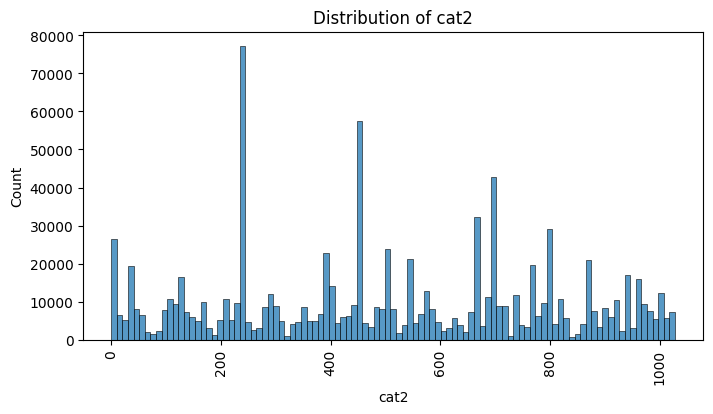

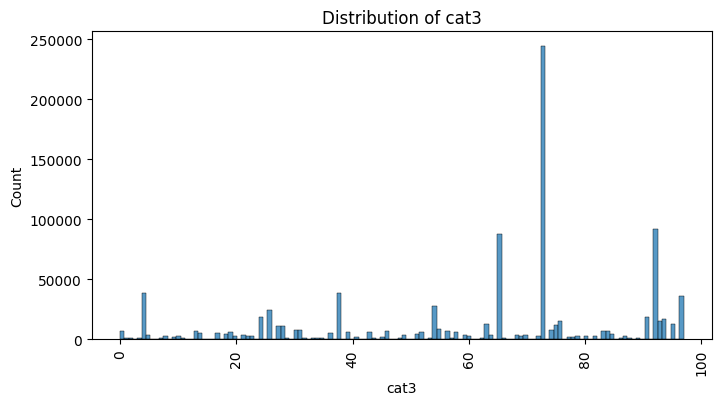

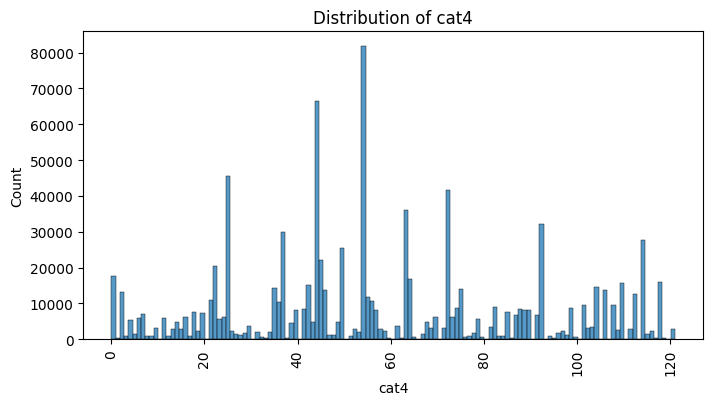

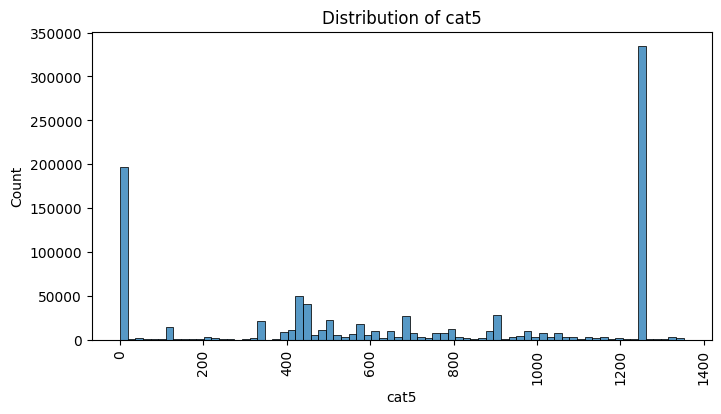

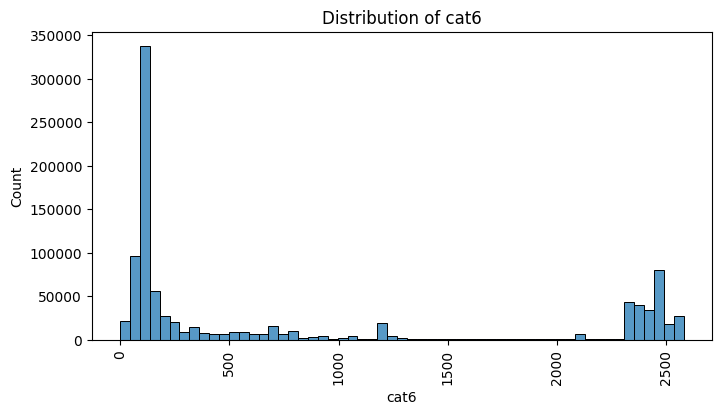

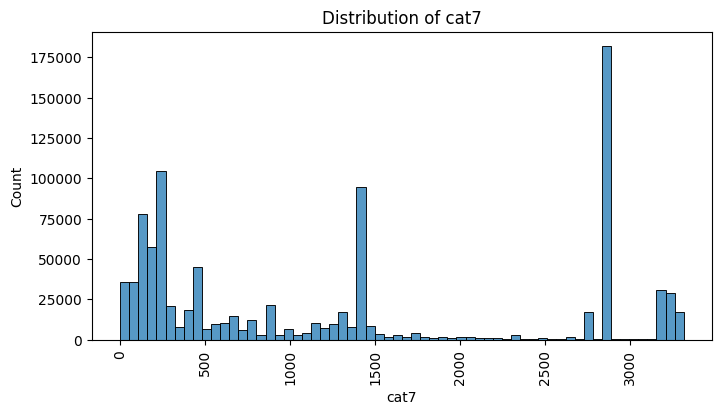

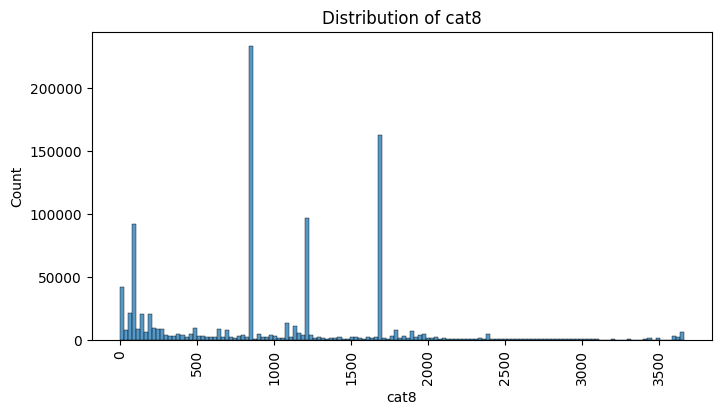

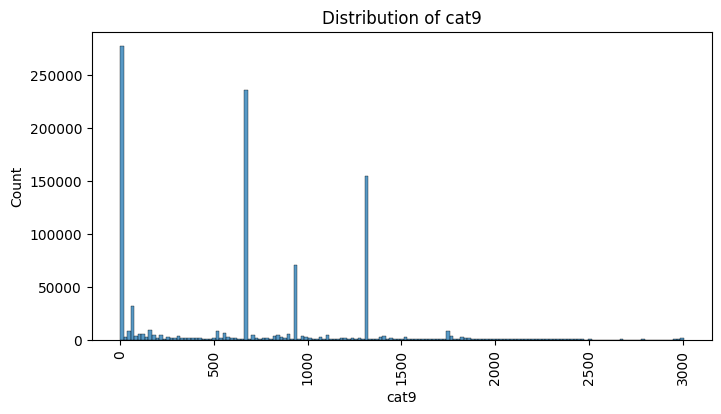

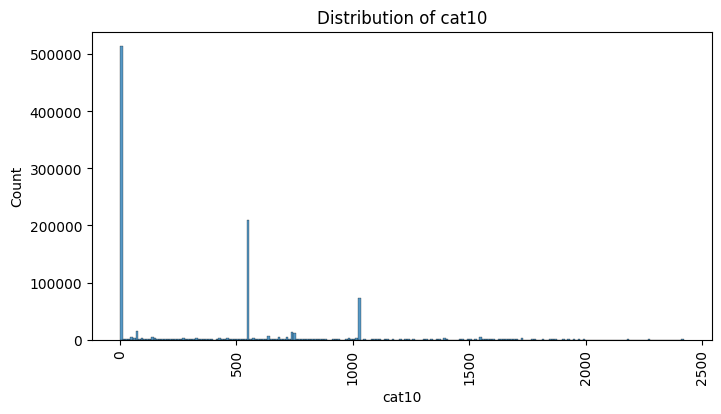

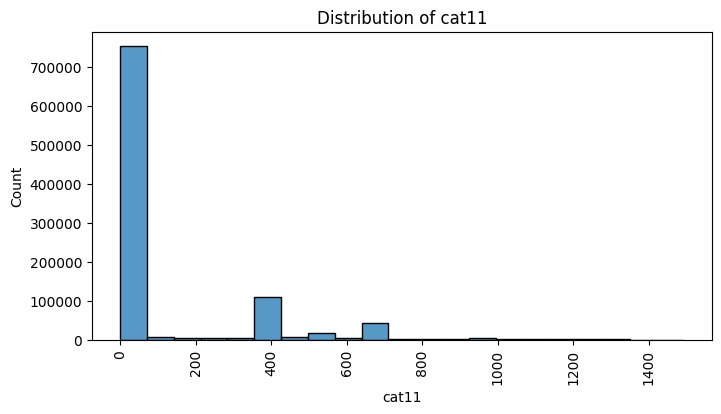

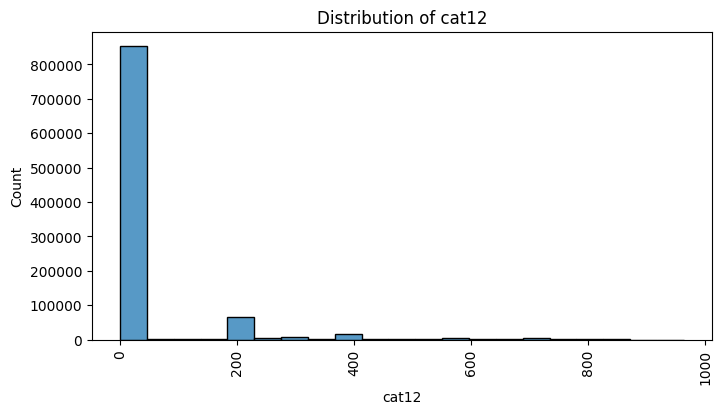

In [46]:
categorical_features = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12']
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

In [49]:
for col in categorical_features:
    print(f"No. of categories in {col}: ",df[col].nunique())

No. of categories in cat0:  9
No. of categories in cat1:  9
No. of categories in cat2:  1021
No. of categories in cat3:  98
No. of categories in cat4:  122
No. of categories in cat5:  1289
No. of categories in cat6:  2466
No. of categories in cat7:  3154
No. of categories in cat8:  3504
No. of categories in cat9:  2836
No. of categories in cat10:  2272
No. of categories in cat11:  1407
No. of categories in cat12:  895


In [50]:
corr_matrix = df[numerical_features].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Highly correlated features:", high_corr_features)

Highly correlated features: ['num34', 'num36', 'num39', 'num40', 'num41', 'num42', 'num43', 'num46', 'num47', 'num48', 'num50']


In [51]:
cat_features = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12']
cat_corr_matrix = df[cat_features].corr().abs()
upper_triangle_cat = cat_corr_matrix.where(np.triu(np.ones(cat_corr_matrix.shape), k=1).astype(bool))
high_corr_cat_features = [column for column in upper_triangle_cat.columns if any(upper_triangle_cat[column] > 0.5)]
print("Highly correlated categorical features:", high_corr_cat_features)

Highly correlated categorical features: ['cat1', 'cat11', 'cat12']


In [52]:
low_variance_features = [col for col in df.columns if df[col].var() < 0.1]
print("Low-variance features:", low_variance_features)

Low-variance features: ['click', 'displayrandom']


### More Analysis

In [53]:
new_df=df.groupby(['rank','protected_attribute','senior','displayrandom','click']).size().reset_index().rename(columns={0:'click_counts'})

In [54]:
new_df.head()

,rank,protected_attribute,senior,displayrandom,click,click_counts
0,1,0,0,0,0,25517
1,1,0,0,0,1,507
2,1,0,0,1,0,2658
3,1,0,0,1,1,57
4,1,0,1,0,0,40474


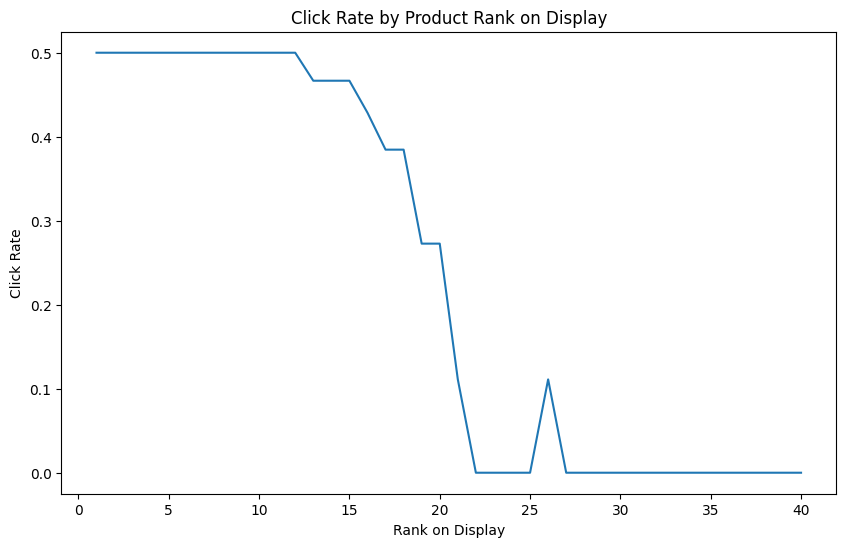

In [55]:
rank_click_rate = new_df.groupby('rank')['click'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=rank_click_rate, x='rank', y='click')
plt.title("Click Rate by Product Rank on Display")
plt.xlabel("Rank on Display")
plt.ylabel("Click Rate")
plt.show()

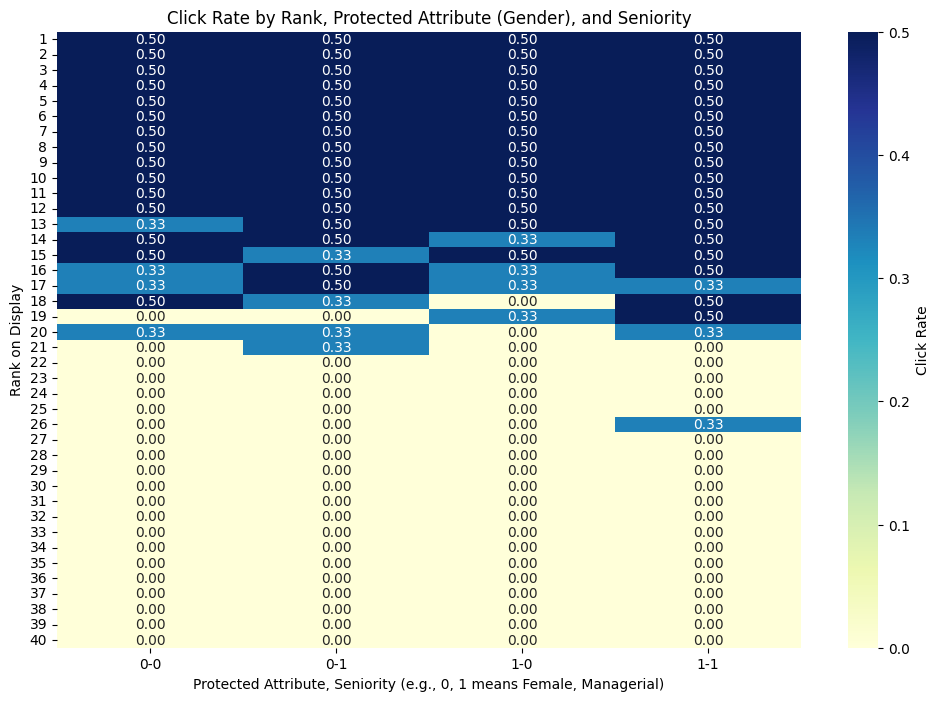

In [56]:
pivot_data = new_df.groupby(['rank', 'protected_attribute', 'senior'])['click'].mean().unstack(['protected_attribute', 'senior'])

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Click Rate'})
plt.title("Click Rate by Rank, Protected Attribute (Gender), and Seniority")
plt.xlabel("Protected Attribute, Seniority (e.g., 0, 1 means Female, Managerial)")
plt.ylabel("Rank on Display")
plt.show()

### Concusions

- Females are more likely to click on Assistant roles than Males
- Males are more likely to click on Managerial roles than Females

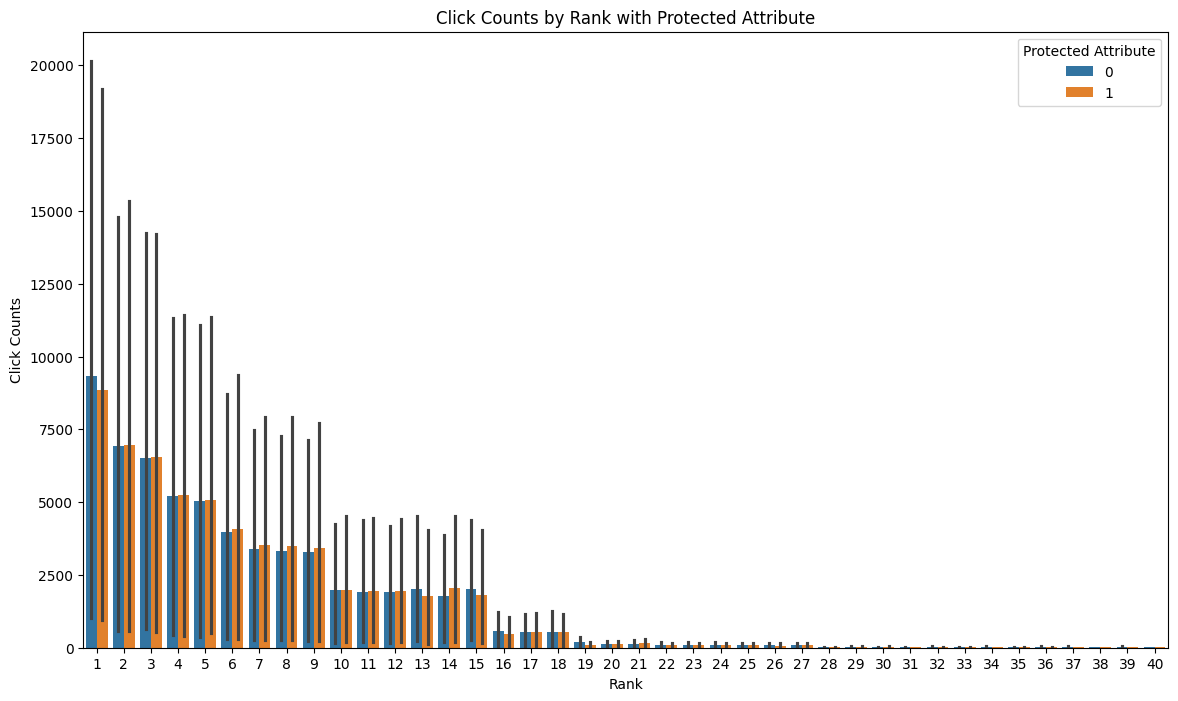

In [57]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='protected_attribute',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with Protected Attribute")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='Protected Attribute', loc='upper right')

plt.show()

- Both genders are highly likely to click on lower ranked Ads

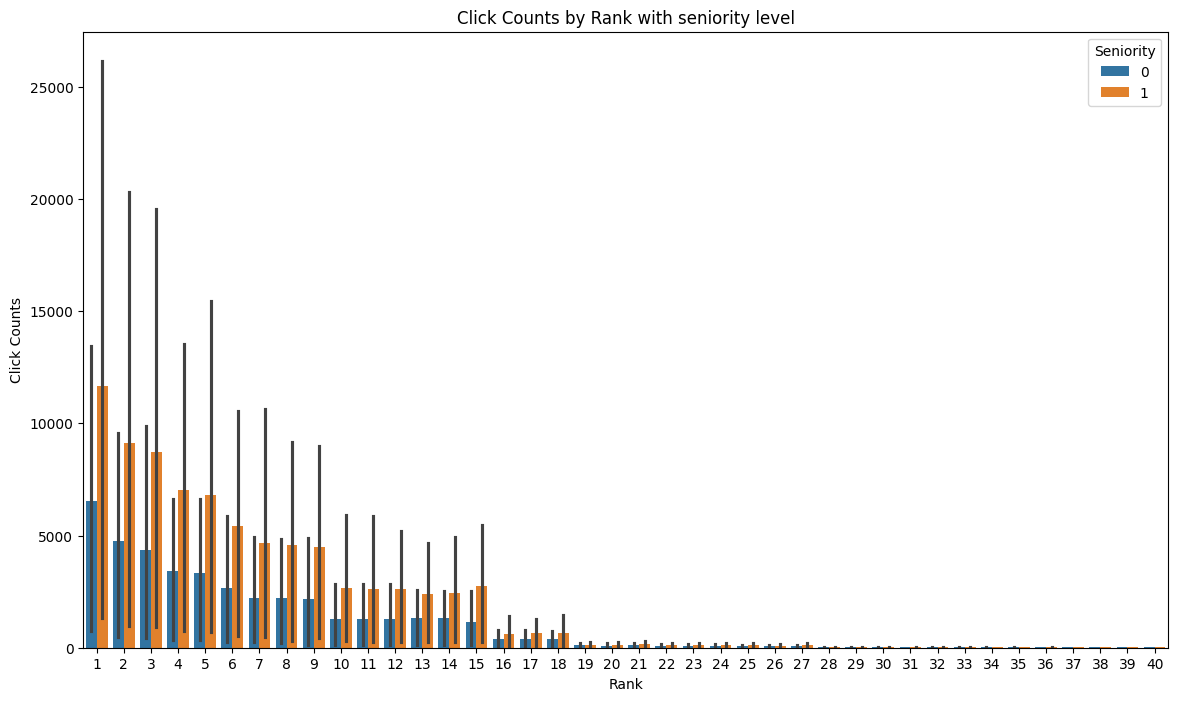

In [60]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='senior',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with seniority level")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='Seniority', loc='upper right')

plt.show()

In [64]:
df[df['senior']==1]['senior'].count()

642125

- No matter at what rank, Managerial role is more likely to be clicked than Assistant roles

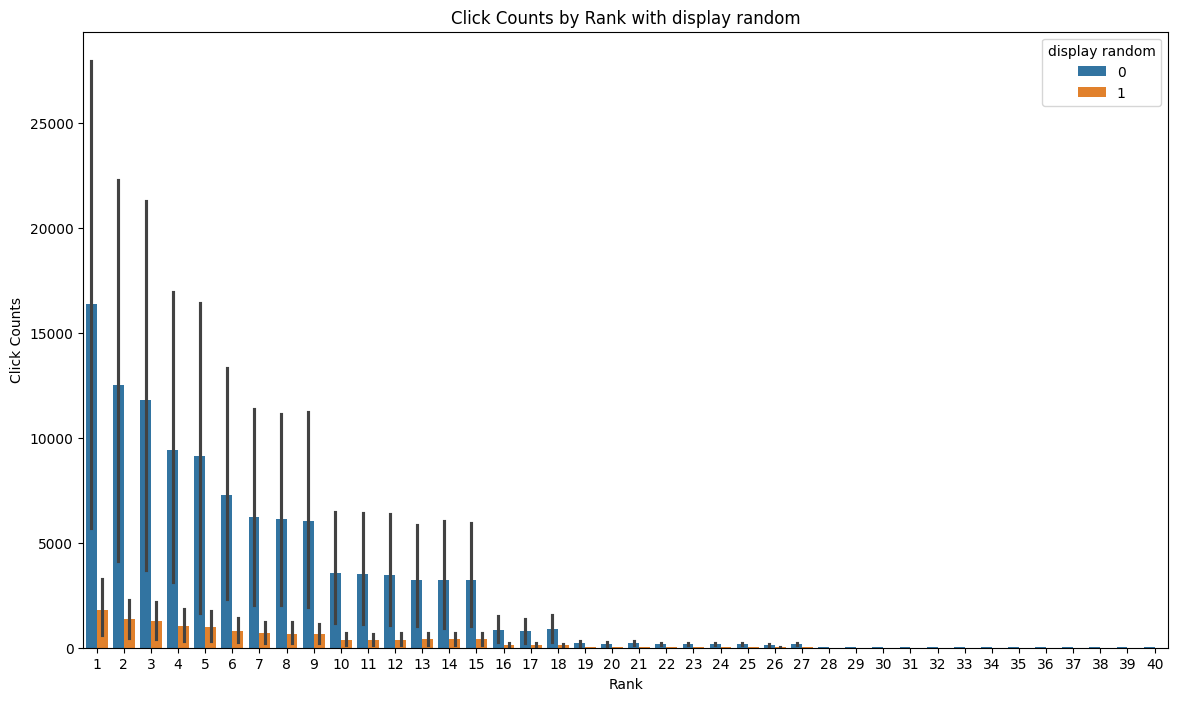

In [65]:
plt.figure(figsize=(14, 8))

sns.barplot(
    x='rank', 
    y='click_counts', 
    hue='displayrandom',  
    data=new_df,                 
)

plt.title("Click Counts by Rank with display random")
plt.xlabel("Rank")
plt.ylabel("Click Counts")

plt.legend(title='display random', loc='upper right')

plt.show()

- 


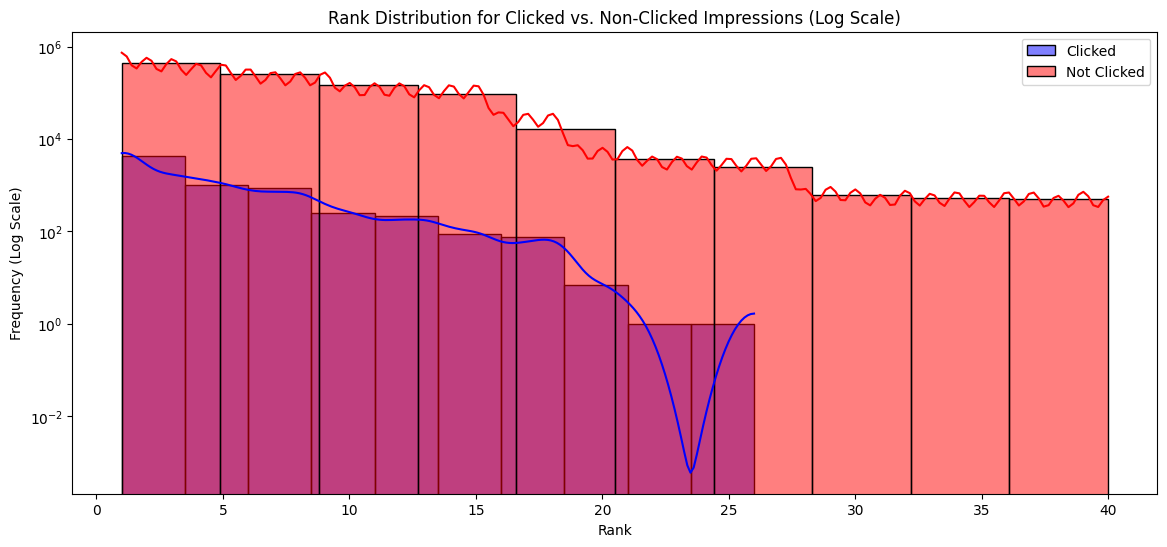

In [66]:
clicked_df = df[df['click'] == 1]
non_clicked_df = df[df['click'] == 0]

plt.figure(figsize=(14, 6))
sns.histplot(clicked_df['rank'], color='blue', kde=True, label='Clicked', bins=10)
sns.histplot(non_clicked_df['rank'], color='red', kde=True, label='Not Clicked', bins=10)
plt.yscale('log')
plt.title("Rank Distribution for Clicked vs. Non-Clicked Impressions (Log Scale)")
plt.xlabel("Rank")
plt.ylabel("Frequency (Log Scale)")
plt.legend()
plt.show()

### New Analysis

In [68]:
product_ctr = df.groupby('product_id')['click'].mean().reset_index()
product_ctr.rename(columns={'click': 'click_through_rate'}, inplace=True)

top_products = product_ctr.sort_values('click_through_rate', ascending=False)


In [69]:
top_products

,product_id,click_through_rate
7584,8467,1.0
12424,13832,1.0
38359,42586,1.0
19567,21785,1.0
10635,11848,1.0
...,...,...
19252,21440,0.0
19253,21441,0.0
19254,21442,0.0
19256,21444,0.0


C:\Users\2502h\AppData\Local\Temp\ipykernel_12336\497407813.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_ctr, x='CTR_Bucket', y='rank', palette='viridis', showmeans=True)


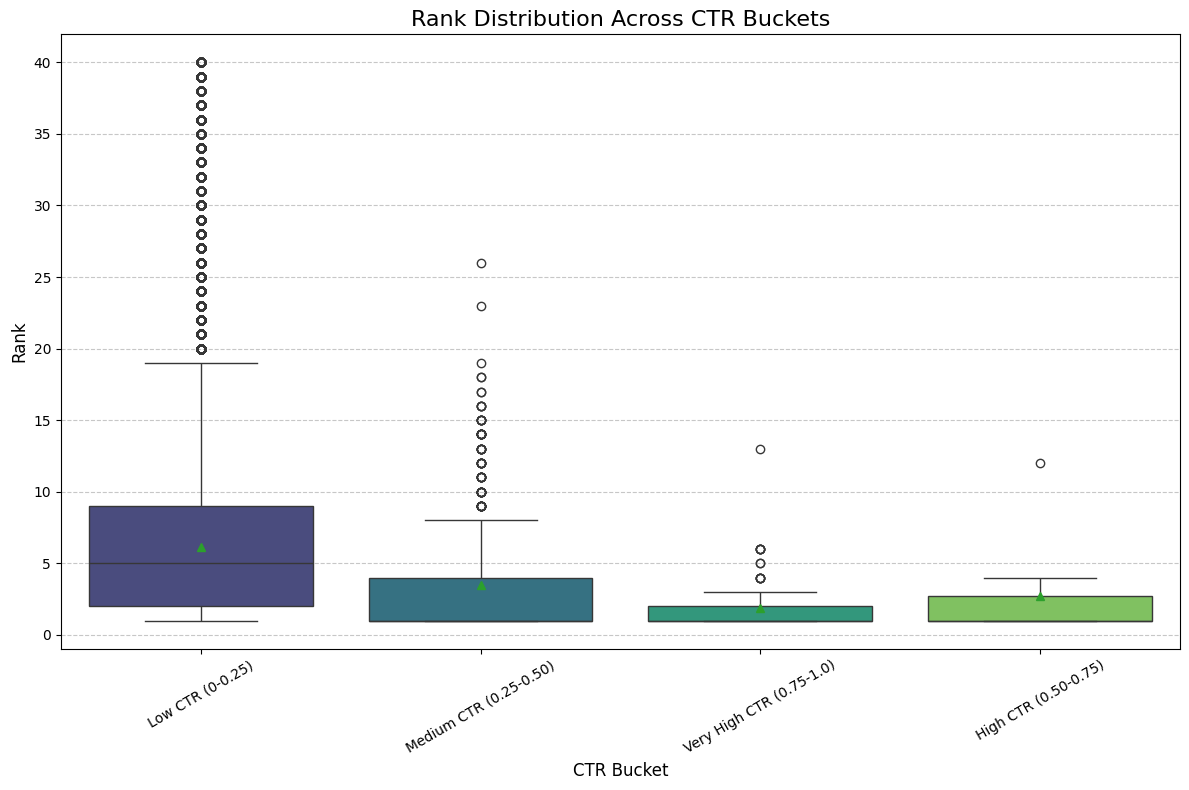

                             count      mean       std  min  25%  50%   75%   
CTR_Bucket                                                                    
High CTR (0.50-0.75)          10.0  2.700000  3.433495  1.0  1.0  1.0  2.75  \
Low CTR (0-0.25)          964271.0  6.176527  4.753162  1.0  2.0  5.0  9.00   
Medium CTR (0.25-0.50)       638.0  3.467085  3.941648  1.0  1.0  1.0  4.00   
Very High CTR (0.75-1.0)      83.0  1.903614  1.916644  1.0  1.0  1.0  2.00   

                           max  
CTR_Bucket                      
High CTR (0.50-0.75)      12.0  
Low CTR (0-0.25)          40.0  
Medium CTR (0.25-0.50)    26.0  
Very High CTR (0.75-1.0)  13.0  


In [74]:
# product_ctr = df.groupby('product_id')['click'].mean().reset_index()
# product_ctr.rename(columns={'click': 'click_through_rate'}, inplace=True)

def categorize_ctr(ctr):
    if ctr <= 0.25:
        return 'Low CTR (0-0.25)'
    elif ctr <= 0.50:
        return 'Medium CTR (0.25-0.50)'
    elif ctr <= 0.75:
        return 'High CTR (0.50-0.75)'
    else:
        return 'Very High CTR (0.75-1.0)'

product_ctr['CTR_Bucket'] = product_ctr['click_through_rate'].apply(categorize_ctr)

df_with_ctr = df.merge(product_ctr[['product_id', 'CTR_Bucket']], on='product_id')

plt.figure(figsize=(12, 8))



bucket_summary = df_with_ctr.groupby('CTR_Bucket')['rank'].describe()
print(bucket_summary)


C:\Users\2502h\AppData\Local\Temp\ipykernel_8592\3975246738.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='click', y='rank', palette='viridis', showmeans=True)


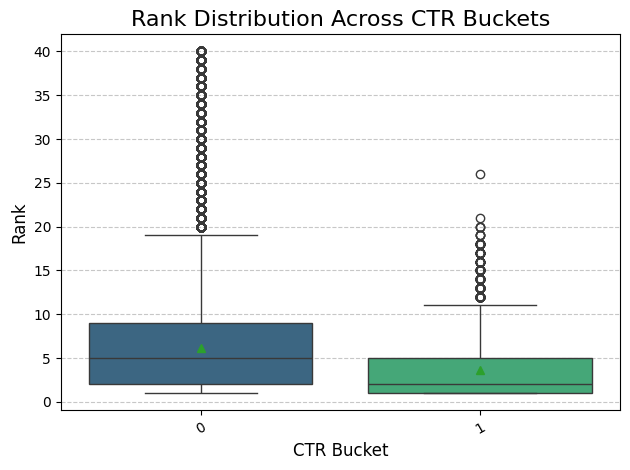

In [7]:
sns.boxplot(data=df, x='click', y='rank', palette='viridis', showmeans=True)
plt.title('Rank Distribution Across CTR Buckets', fontsize=16)
plt.xlabel('CTR Bucket', fontsize=12)
plt.ylabel('Rank', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [30]:
df[(df['click'] == 1) & (df['rank'] > 10)].shape



(382, 56)

In [13]:
df.shape

(965002, 56)

Top Products based on Rank and Click Count:
       product_id  average_rank  click_count  normalized_rank   
34597       38418      4.124402          109         0.105754  \
12835       14300      4.396047           43         0.112719   
10027       11182      4.950712           23         0.126941   
30997       34435      5.449438           24         0.139729   
9814        10948      5.331947           23         0.136717   
30003       33343      5.126108           21         0.131439   
47737       53067      5.364435           20         0.137550   
54229       60272      5.747435           21         0.147370   
44984       49963      6.501759           23         0.166712   
10266       11442      5.584665           20         0.143197   

       normalized_clicks  composite_score  
34597           1.000000         0.894246  
12835           0.394495         0.281776  
10027           0.211009         0.084068  
30997           0.220183         0.080454  
9814            0.21

C:\Users\2502h\AppData\Local\Temp\ipykernel_12336\168041316.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


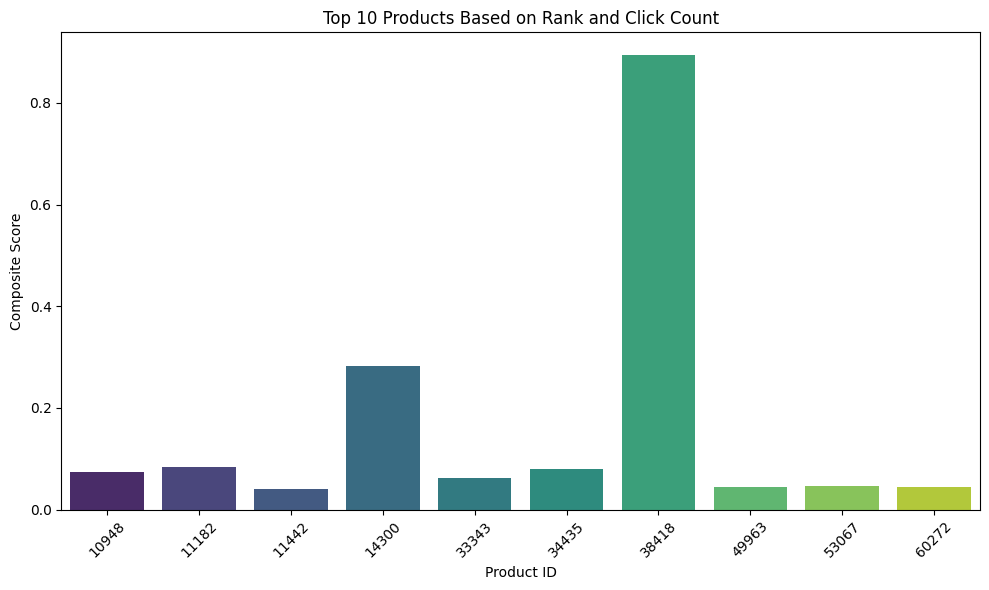

In [77]:
# Step 1: Calculate CTR (Click Through Rate) for each product
product_performance = df.groupby('product_id').agg(
    average_rank=('rank', 'mean'),  # Average rank across all rows for each product
    click_count=('click', 'sum')   # Total clicks for each product
).reset_index()

# Step 2: Define "best" products criteria: High rank (lower values are better) and high click count
# Normalize the values for better comparison
product_performance['normalized_rank'] = product_performance['average_rank'] / product_performance['average_rank'].max()
product_performance['normalized_clicks'] = product_performance['click_count'] / product_performance['click_count'].max()

# Composite score: Higher clicks and lower ranks
product_performance['composite_score'] = (
    product_performance['normalized_clicks'] - product_performance['normalized_rank']
)

# Step 3: Sort by composite score in descending order
top_products = product_performance.sort_values(by='composite_score', ascending=False)

# Step 4: Display top products
print("Top Products based on Rank and Click Count:")
print(top_products.head(10))  # Top 10 products

# Optional: Visualize the top products
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_products.head(10),
    x='product_id',
    y='composite_score',
    palette='viridis'
)
plt.title('Top 10 Products Based on Rank and Click Count')
plt.xlabel('Product ID')
plt.ylabel('Composite Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [78]:
top_products

,product_id,average_rank,click_count,normalized_rank,normalized_clicks,composite_score
34597,38418,4.124402,109,0.105754,1.000000,0.894246
12835,14300,4.396047,43,0.112719,0.394495,0.281776
10027,11182,4.950712,23,0.126941,0.211009,0.084068
30997,34435,5.449438,24,0.139729,0.220183,0.080454
9814,10948,5.331947,23,0.136717,0.211009,0.074293
...,...,...,...,...,...,...
49407,54905,33.000000,0,0.846154,0.000000,-0.846154
42268,46942,33.000000,0,0.846154,0.000000,-0.846154
33375,37047,36.000000,0,0.923077,0.000000,-0.923077
10990,12251,39.000000,0,1.000000,0.000000,-1.000000
